In [35]:
#Week1 Day2
#Hamza Asim
#Build a linear regression model to predict housing prices based on a given dataset.
#Step 1: Load and explore the dataset, including visualizing the features and target variable.
#Step 2: Split the dataset into training and testing sets.
#Step 3: Preprocess the data by handling missing values and performing feature scaling.
#Step 4: Train a linear regression model on the training data.
#Step 5: Evaluate the model's performance on the testing data using metrics such as mean squared error (MSE) or R-squared.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


<Axes: ylabel='Frequency'>

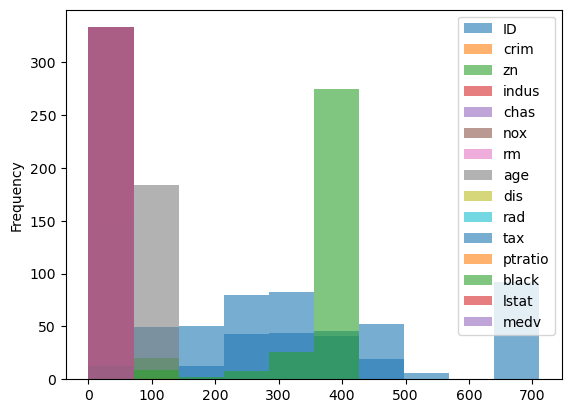

In [8]:
train.plot(kind='hist',alpha=0.6)

<Axes: ylabel='Frequency'>

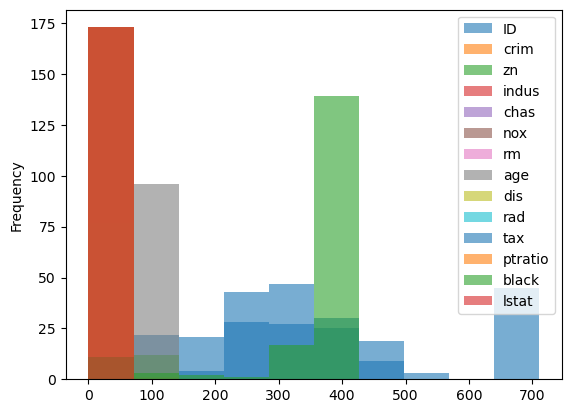

In [12]:
test.plot(kind='hist',alpha=0.6)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       173 non-null    int64  
 1   crim     173 non-null    float64
 2   zn       173 non-null    float64
 3   indus    173 non-null    float64
 4   chas     173 non-null    int64  
 5   nox      173 non-null    float64
 6   rm       173 non-null    float64
 7   age      173 non-null    float64
 8   dis      173 non-null    float64
 9   rad      173 non-null    int64  
 10  tax      173 non-null    int64  
 11  ptratio  173 non-null    float64
 12  black    173 non-null    float64
 13  lstat    173 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 19.1 KB


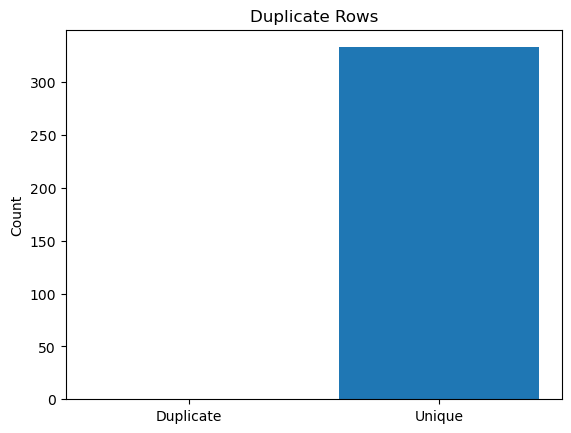

In [20]:
duplicate_counts = train.duplicated().sum()
unique_counts = train.drop_duplicates().shape[0]
plt.bar(['Duplicate', 'Unique'], [duplicate_counts, unique_counts])
plt.ylabel('Count')
plt.title('Duplicate Rows')
plt.show()

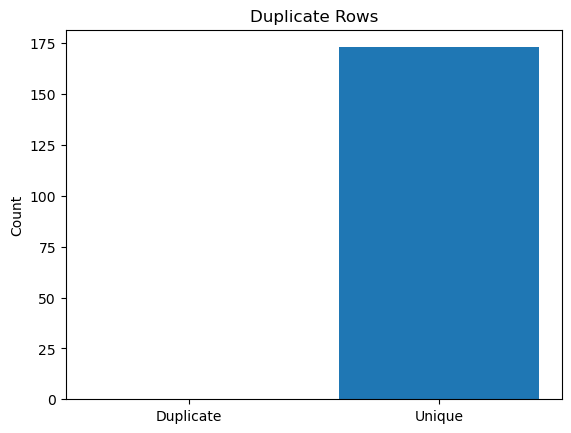

In [21]:
duplicate_counts = test.duplicated().sum()
unique_counts = test.drop_duplicates().shape[0]
plt.bar(['Duplicate', 'Unique'], [duplicate_counts, unique_counts])
plt.ylabel('Count')
plt.title('Duplicate Rows')
plt.show()

In [37]:
#Now we will visualize the relation between a numerical column and the median 
#value of a house in order to check if a relation between them exists

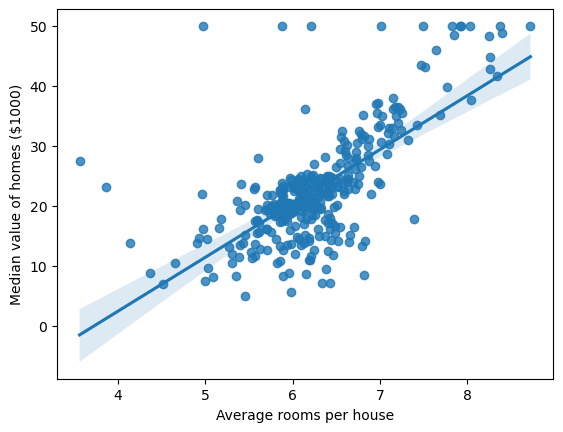

In [30]:
sns.regplot(x='rm',y='medv',data=train)
plt.xlabel('Average rooms per house')
plt.ylabel('Median value of homes ($1000)')
plt.show()

In [36]:
#The graph show us that the more rooms in a house has a direct relation to higher prices

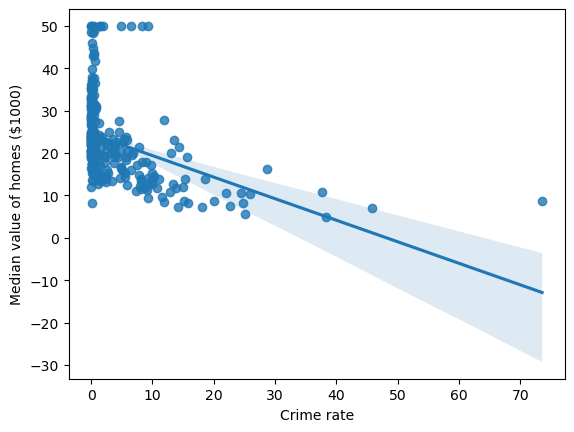

In [33]:
sns.regplot(y='medv',x='crim',data=train)
plt.ylabel('Median value of homes ($1000)')
plt.xlabel('Crime rate')
plt.show()

In [39]:
#The graph show us that the lesser crime in an area has a direct relation to 
#higher prices of houses which is true in real life

In [40]:
#Now we will create a linear regression model to predict the median value of homes using the testingSet.
#But before proceeding any further, we have to divide the trainingSet into 
#trainingSet2 and testingSet2 to train the model initially.
#Afterwards, we'll use the trainingSet to predict values for the random data.
#We do this to avoid overfitting

In [42]:
A = train[['crim']]
B = train['medv']
#We can set the split percentage by our choice. I chose the test size to be 25%␣
#or 0.25 and the rest is for training the model.
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.25)

In [43]:
#Now, at this point we wouldve preprocessed the data for null and duplicate␣
#values, but as we checked before, no duplicates or nulls existed in the␣
#testingSet.
#So, we do not need to perform StandardScaling or MinMaxScaling

In [44]:
nulls = A_train.isnull().sum()
duplicates = A_train.duplicated().sum()
print(f"The number of null values in the training set are: {nulls}")
print(f"The number of duplicate entries in the training set are: {duplicates}")

The number of null values in the training set are: crim    0
dtype: int64
The number of duplicate entries in the training set are: 1


In [46]:
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)
A_train

array([[-0.52374921],
       [-0.52500807],
       [-0.43147837],
       [ 2.2262196 ],
       [-0.52841604],
       [-0.43813609],
       [-0.50170172],
       [-0.49753391],
       [-0.47415974],
       [-0.52198089],
       [ 0.17067543],
       [-0.52176702],
       [-0.3240838 ],
       [-0.5153962 ],
       [-0.47616801],
       [ 0.85819372],
       [ 0.25822379],
       [-0.52922804],
       [-0.51695413],
       [-0.50236592],
       [ 0.48950161],
       [-0.48484269],
       [-0.52266944],
       [ 0.23742125],
       [ 2.61297221],
       [ 1.39992558],
       [-0.52708589],
       [-0.52207478],
       [ 2.08070269],
       [-0.11966114],
       [-0.5233632 ],
       [-0.50292407],
       [-0.50690409],
       [-0.49292793],
       [ 6.01699684],
       [-0.43863685],
       [ 1.10129859],
       [ 0.01856688],
       [-0.50676325],
       [ 0.81641998],
       [-0.21848189],
       [-0.45362671],
       [ 1.2477666 ],
       [-0.51891197],
       [-0.31721048],
       [ 0

In [48]:
#We will train a Linear Regression Model on the training set as below:
myModel = LinearRegression()
myModel.fit(A_train, B_train)

LinearRegression()

In [49]:
#Now, as our model has been trained, we will try to make some predictions

In [50]:
pred = myModel.predict(A_test)
pred

array([ 24.89083382,  23.45897462,  25.0102257 ,  21.6882657 ,
        25.03877181,  18.81767431,  25.09498557,  25.08370627,
        21.73222333,  21.1190583 ,  25.10632811,  25.09849234,
        18.05915746,  25.04057087,  19.95322886,  -7.01798552,
        15.05738891,  25.09087442,  25.02880667,  25.06613728,
        25.06656596,  25.08424037,  25.09828151,  25.06681192,
        20.45372742,  25.12098066,  24.84401596,  25.09860478,
        25.05230696,  25.06369167,  25.0582242 ,  25.04088711,
        24.59530221,  11.01567629,  24.89759437,  23.27842858,
        24.76500467,  25.08403657,  24.96941643,  21.79076322,
       -26.54627704,  25.12042548,  25.11298325,  25.11016518,
        25.07245509,  24.95498877,  24.43590924,   7.98755425,
        25.03178637,  25.09553372,  25.08201262,  24.74787138,
        22.79663749,  21.74876629,  25.02451984,  25.11739658,
        19.92738135,  25.01661379,  25.08028383,  24.33585029,
        23.55469755,  25.04969269,  25.08991867,  24.90

In [51]:
predictionAccuracy = r2_score(B_test, pred)
predictionAccuracy

-0.021408018271021456

In [52]:
#As the score is pretty poor, so the model needs more training in order to perform better.
#For that, we can create a bigger split for the training of the model making the testingSet smaller.
#It will eventually improvet the prediction accuracy of the model